<a href="https://colab.research.google.com/github/t8101349/Colab-/blob/master/MNIST_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align="center">
  <img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3004/logos/header.png"
  />
  <center>MNIST 手寫數字資料庫</center>
  <center>圖片來源: https://www.kaggle.com/</center>
</p>

## 1: 切換 TensorFlow 至 2.x 版

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## 2: 載入套件及資料集

In [2]:
%matplotlib inline
# Import some useful package
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider, BoundedIntText

# For DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# For RNN
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU

# For training
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 3: 資料前處理 (Data Preprocessing)

在這裡，我們需要用兩種不同的方式來進行 MNIST 的 RNN 分類模型。

1. 每次看一個點：將每張圖片拉長成 784 維的向量，並當作一個 784 個時間點的資料，且每個時間的資料維度是 1。
2. 每次看一列向量：將每張圖片看成 28 個 28 維的列向量 (row vector)，並當作一個 28 個時間點的資料，且每個時間的資料維度是 28。

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


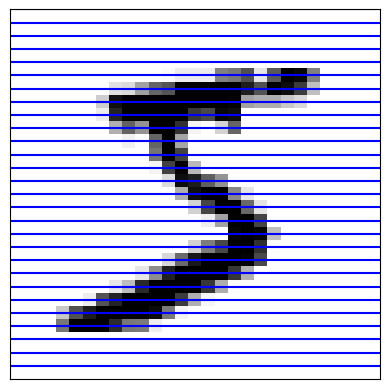

In [4]:
plt.imshow(X_train[0], 'gray_r')
plt.xticks([])
plt.yticks([])
plt.xlim(0, 28)
plt.ylim(28, 0)
for i in range(28):
#     plt.vlines(i, 0, 28, colors='b')
    plt.hlines(i, 0, 28, colors='b')
plt.savefig('example_mnist_5_row')

Data shape: (28, 28)


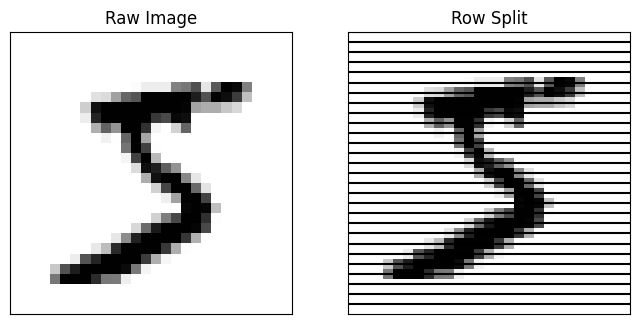

In [5]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(X_train[0], 'gray_r')
plt.xticks([])
plt.yticks([])
plt.title('Raw Image')

plt.subplot(1, 2, 2)
plt.imshow(X_train[0], 'gray_r')
plt.xlim(0, 28)
plt.ylim(28, 0)
plt.xticks([])
plt.yticks([])
plt.title('Row Split')
for i in range(28):
    # plt.vlines(i, 0, 28, colors='b')
    plt.hlines(i, 0, 28, colors='k')

print("Data shape:", X_train[0].shape)

In [6]:
# Normalize data range
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# Reshape each data as a vector
X_vec_train = X_train.reshape(-1, 28*28, 1)
X_vec_test = X_test.reshape(-1, 28*28, 1)

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 4: 建立逐點輸入的 LSTM 分類模型

In [13]:
model_pixel = Sequential()
model_pixel.add(SimpleRNN(40, input_shape=(784, 1), return_sequences=True))
model_pixel.add(LSTM(40))
# model_pixel.add(GRU(40, input_shape=(784, 1)))
model_pixel.add(Dense(10, activation='softmax'))
model_pixel.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 784, 40)             │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 40)                  │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,050 (58.79 KB)

 Trainable params: 15,050 (58.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_pixel.compile(loss='categorical_crossentropy',
                    optimizer=SGD(),
                    metrics=['categorical_accuracy'])

In [15]:
training_history = model_pixel.fit(X_vec_train, y_train,
                                   batch_size=512,
                                   epochs=5,
                                   validation_data=(X_vec_test, y_test)
                                   )

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 309s 3s/step - categorical_accuracy: 0.1234 - loss: 2.2984 - val_categorical_accuracy: 0.0803 - val_loss: 2.3127
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 326s 3s/step - categorical_accuracy: 0.1378 - loss: 2.2972 - val_categorical_accuracy: 0.0736 - val_loss: 2.3023
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - categorical_accuracy: 0.1151 - loss: 2.3027 - val_categorical_accuracy: 0.0974 - val_loss: 2.3046
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - categorical_accuracy: 0.1076 - loss: 2.3022 - val_categorical_accuracy: 0.1167 - val_loss: 2.2998
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - categorical_accuracy: 0.1170 - loss: 2.3014 - val_categorical_accuracy: 0.2143 - val_loss: 2.2641


## 5: 建立列向量當輸入的 LSTM 分類模型

In [16]:
model_row = Sequential()
model_row.add(SimpleRNN(40, input_shape=(28, 28)))
model_row.add(Dense(10, activation='softmax'))
model_row.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 40)                  │           2,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             410 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,170 (12.38 KB)

 Trainable params: 3,170 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_row.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['categorical_accuracy'])

In [18]:
training_history = model_row.fit(X_train, y_train,
                                 batch_size=512,
                                 epochs=5,
                                 validation_data=(X_test, y_test)
                                 )

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - categorical_accuracy: 0.4441 - loss: 1.7255 - val_categorical_accuracy: 0.6502 - val_loss: 1.0468
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - categorical_accuracy: 0.7140 - loss: 0.9185 - val_categorical_accuracy: 0.7690 - val_loss: 0.7546
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - categorical_accuracy: 0.7828 - loss: 0.7139 - val_categorical_accuracy: 0.8254 - val_loss: 0.5968
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - categorical_accuracy: 0.8214 - loss: 0.5894 - val_categorical_accuracy: 0.8309 - val_loss: 0.5510
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - categorical_accuracy: 0.8450 - loss: 0.5146 - val_categorical_accuracy: 0.8424 - val_loss: 0.5186


## 6: 視覺化預測結果

在這部分，我們提供簡單的視覺化方法來呈現神經網路的輸入與輸出結果

In [19]:
model_list = ['model_pixel', 'model_row']
def visulization(model='model_row', idx=0):
    # Random pick one data from training set
    # idx = np.random.randint(X_train.shape[0])
    sample_x = X_test[idx]
    sample_y = y_test[idx]
    # Predict the class of random data
    if model=='model_pixel':
        model = model_pixel
        predict_y = model.predict(X_vec_test[idx:idx+1]).squeeze()
    else:
        model = model_row
        predict_y = model.predict(X_test[idx:idx+1]).squeeze()
    predict_label = predict_y.argmax()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    # Plot raw image
    ax1.imshow(sample_x, 'gray_r')
    ax1.set_title("Image Label: %s" %sample_y.argmax())

    # Plot prediction probability of each classes
    ax2.barh(np.arange(10), predict_y)
    ax2.patches[predict_label].set_facecolor('Red')
    ax2.set_title("Prediction Result: %d" %predict_label);
    if sample_y.argmax()==predict_y.argmax():
        print("預測正確!")
    else:
        print("預測失敗QQ")
    plt.show()

In [20]:
interact(visulization, model=model_list, idx=BoundedIntText(value=5566, min=0, max=X_test.shape[0]-1));

interactive(children=(Dropdown(description='model', index=1, options=('model_pixel', 'model_row'), value='mode…

## 7: [練習] 建構屬於你自己的 RNN 分類模型

1. 使用堆疊 (stack) 的方式來建構 MNIST 上的分類模型

2. 使用不同的資料集 (如：CIFAR-10 或其他 Keras 提供的資料集，甚至是自己蒐集的資料等等) 來建立分類模型。

注意：若要使用語言相關的語料資料，建議要有自然語言處理 (NLP) 的背景及相關知識，才有辦法針對這類問題建構神經網路模型。



In [21]:
# 自己的rnn模型(kAGGLE Store Sales)

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)

# Helper imports
import os
import warnings
import pandas_datareader as web
import datetime as dt

# ML/DL imports
from keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Plotting imports
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

In [24]:
path = '/content/drive/MyDrive/'

train_data = pd.read_csv(path+'train.csv', index_col=0)


In [25]:
def basic_eda(df):
    print("-------------------------------TOP 5 RECORDS-----------------------------")
    print(df.head(5))
    print("-------------------------------INFO--------------------------------------")
    print(df.info())
    print("-------------------------------Describe----------------------------------")
    print(df.describe())
    print("-------------------------------Columns-----------------------------------")
    print(df.columns)
    print("-------------------------------Data Types--------------------------------")
    print(df.dtypes)
    print("----------------------------Missing Values-------------------------------")
    print(df.isnull().sum())
    print("----------------------------NULL values----------------------------------")
    print(df.isna().sum())
    print("--------------------------Shape Of Data---------------------------------")
    print(df.shape)
    print("============================================================================ \n")

In [26]:
#Litle bit of exploration of data

print("=================================Train Data=================================")
basic_eda(train_data)


=================================Train Data=================================
-------------------------------TOP 5 RECORDS-----------------------------
          date  store_nbr      family  sales  onpromotion
id                                                       
0   2013-01-01          1  AUTOMOTIVE    0.0            0
1   2013-01-01          1   BABY CARE    0.0            0
2   2013-01-01          1      BEAUTY    0.0            0
3   2013-01-01          1   BEVERAGES    0.0            0
4   2013-01-01          1       BOOKS    0.0            0
-------------------------------INFO--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB
None
-----------

In [27]:
vallidate_data = train_data[-500000:]
train_data = train_data[:-500000]

In [28]:
basic_eda(train_data)
basic_eda(vallidate_data)

-------------------------------TOP 5 RECORDS-----------------------------
          date  store_nbr      family  sales  onpromotion
id                                                       
0   2013-01-01          1  AUTOMOTIVE    0.0            0
1   2013-01-01          1   BABY CARE    0.0            0
2   2013-01-01          1      BEAUTY    0.0            0
3   2013-01-01          1   BEVERAGES    0.0            0
4   2013-01-01          1       BOOKS    0.0            0
-------------------------------INFO--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2500888 entries, 0 to 2500887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.5+ MB
None
-------------------------------Describe----------------------------------
          stor

In [29]:
print(min(train_data['date']))
print(max(train_data['date']))

2013-01-01
2016-11-07


In [30]:
print(min(vallidate_data['date']))
print(max(vallidate_data['date']))

2016-11-07
2017-08-15


In [31]:
object_cols = [cname for cname in train_data.columns
               if train_data[cname].dtype == "object"
               and cname != "date"]

print("Categorical variables:")
object_cols

Categorical variables:


['family']

In [32]:
num_cols = [cname for cname in train_data.columns
            if train_data[cname].dtype in ['int64', 'float64']]

print("Numerical variables:")
num_cols

Numerical variables:


['store_nbr', 'sales', 'onpromotion']

In [33]:
all_cols = num_cols + object_cols
print(all_cols)

['store_nbr', 'sales', 'onpromotion', 'family']


In [34]:
ordinal_encoder = OrdinalEncoder()
train_data[object_cols] = ordinal_encoder.fit_transform(train_data[object_cols])
train_data

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,0.0,0.000,0
1,2013-01-01,1,1.0,0.000,0
2,2013-01-01,1,2.0,0.000,0
3,2013-01-01,1,3.0,0.000,0
4,2013-01-01,1,4.0,0.000,0
...,...,...,...,...,...
2500883,2016-11-07,3,11.0,296.486,5
2500884,2016-11-07,3,12.0,9585.000,79
2500885,2016-11-07,3,13.0,70.000,0


In [35]:
scaler = MinMaxScaler(feature_range=(0,1))

for col in num_cols:
    scaled_data = scaler.fit_transform(train_data[col].values.reshape(-1,1))
    train_data[col] = pd.Series(scaled_data.flatten())

train_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,0.0,0.0,0.0,0.0
1,2013-01-01,0.0,1.0,0.0,0.0
2,2013-01-01,0.0,2.0,0.0,0.0
3,2013-01-01,0.0,3.0,0.0,0.0
4,2013-01-01,0.0,4.0,0.0,0.0


In [36]:
train_data = train_data.groupby(['date']).agg({'sales':'mean', 'onpromotion':'mean'})
train_data.head()


,sales,onpromotion
date,,
2013-01-01,0.000011,0.0
2013-01-02,0.002232,0.0
2013-01-03,0.001626,0.0
2013-01-04,0.001595,0.0
2013-01-05,0.002148,0.0


In [37]:
train_data.tail()

,sales,onpromotion
date,,
2016-11-03,0.003572,0.009876
2016-11-04,0.003863,0.013424
2016-11-05,0.003994,0.009953
2016-11-06,0.005131,0.011156
2016-11-07,0.002785,0.008801


In [38]:
vallidate_data = vallidate_data.groupby(['date']).agg({'sales':'mean', 'onpromotion':'mean'})
vallidate_data.head()

,sales,onpromotion
date,,
2016-11-07,568.995313,7.204808
2016-11-08,430.661969,7.853535
2016-11-09,443.477463,12.016274
2016-11-10,330.101997,6.713805
2016-11-11,400.334711,9.925926


In [39]:
x_train = train_data.copy()
y_train = train_data.sales.copy()

In [40]:
x_vallidate = vallidate_data.copy()
y_vallidate = vallidate_data.sales.copy()

In [41]:
y_train.head()

,sales
date,
2013-01-01,0.000011
2013-01-02,0.002232
2013-01-03,0.001626
2013-01-04,0.001595
2013-01-05,0.002148


In [42]:
y_train[30]

0.001220515066519129

In [43]:
y_vallidate[30]

486.8988412684063

In [44]:
num_feature_input = len(x_train.columns)
history_input = 30

"""
length: Number of past time steps to be included,
batch_size: The amount of predicted days. Here we have 1 since we are trying to predict the next day using the last 30 days.
"""
generator = TimeseriesGenerator(x_train, y_train, length=history_input, batch_size = 1)

# Print the first sequence, you should see 30 past day (x) for 1 predicted day (y)
for i in range(len(generator)):
    x, y = generator[i]
    print('%s => %s' % (x, y))
    break

[[[1.13010918e-05 0.00000000e+00]
  [2.23218011e-03 0.00000000e+00]
  [1.62640375e-03 0.00000000e+00]
  [1.59490009e-03 0.00000000e+00]
  [2.14784868e-03 0.00000000e+00]
  [2.33838232e-03 0.00000000e+00]
  [1.51239286e-03 0.00000000e+00]
  [1.43241371e-03 0.00000000e+00]
  [1.36124486e-03 0.00000000e+00]
  [1.16529593e-03 0.00000000e+00]
  [1.30368188e-03 0.00000000e+00]
  [1.81447030e-03 0.00000000e+00]
  [2.09065264e-03 0.00000000e+00]
  [1.31992821e-03 0.00000000e+00]
  [1.34594081e-03 0.00000000e+00]
  [1.43241432e-03 0.00000000e+00]
  [1.20361619e-03 0.00000000e+00]
  [1.33244809e-03 0.00000000e+00]
  [1.94586381e-03 0.00000000e+00]
  [2.07469660e-03 0.00000000e+00]
  [1.40030279e-03 0.00000000e+00]
  [1.33282550e-03 0.00000000e+00]
  [1.27452842e-03 0.00000000e+00]
  [1.11248811e-03 0.00000000e+00]
  [1.30496464e-03 0.00000000e+00]
  [1.86190230e-03 0.00000000e+00]
  [1.93664941e-03 0.00000000e+00]
  [1.28443510e-03 0.00000000e+00]
  [1.19007398e-03 0.00000000e+00]
  [1.26464150e

In [45]:
generator_vallidate = TimeseriesGenerator(x_vallidate, y_vallidate, length=history_input, batch_size = 1)
for i in range(len(generator_vallidate)):
    x, y = generator_vallidate[i]
    print('%s => %s' % (x, y))
    break

[[[568.99531341   7.20480769]
  [430.66196882   7.85353535]
  [443.47746297  12.01627385]
  [330.10199721   6.71380471]
  [400.33471051   9.92592593]
  [521.77484396   7.45117845]
  [667.2178633    8.10662177]
  [412.86373343   5.90291807]
  [388.21640238   7.39506173]
  [466.01107833  11.24635241]
  [345.24593491   5.60213244]
  [414.29043335   8.55892256]
  [525.0594843    6.5701459 ]
  [631.41357346   7.22615039]
  [434.21003415   6.33838384]
  [387.36321605   7.45005612]
  [422.94334537  11.49719416]
  [334.15112583   6.30415264]
  [414.04011495   9.61672278]
  [509.57734197   7.00841751]
  [592.99752642   7.64534231]
  [422.32534683   6.65600449]
  [362.37963425   7.48989899]
  [430.61824036  10.90011223]
  [473.40253372   7.28675645]
  [478.9309376   10.56060606]
  [624.82635637   8.01290685]
  [716.15883065   8.52188552]
  [503.26876485   7.38439955]
  [523.31447022   8.73905724]]] => [486.89884127]


In [46]:
def Multi_Step_LSTM_model():

    # Use Keras sequential model
    model = Sequential()

    # First LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (history_input, num_feature_input)))
    model.add(Dropout(0.2))

    # Second LSTM layer with Dropout regularisation; Set return_sequences to True to feed outputs to next layer
    model.add(LSTM(units = 50,  activation='relu', return_sequences = True))
    model.add(Dropout(0.2))

    # Final LSTM layer with Dropout regularisation; Set return_sequences to False since now we will be predicting with the output layer
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))

    # The output layer with linear activation to predict Open stock price
    model.add(Dense(units=1, activation = "linear"))

    return model

In [47]:
model = Multi_Step_LSTM_model()
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 50)              │          10,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 30, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,051 (199.42 KB)

 Trainable params: 51,051 (199.42 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='mean_squared_error',optimizer=RMSprop(), metrics = ['accuracy'])
training_history = model.fit(generator, steps_per_epoch=len(generator), epochs=20, verbose=2, validation_data= generator_vallidate)

Epoch 1/20
1374/1374 - 48s - 35ms/step - accuracy: 0.0000e+00 - loss: 1.5587e-06 - val_accuracy: 0.0000e+00 - val_loss: 247998.8906
Epoch 2/20
1374/1374 - 81s - 59ms/step - accuracy: 0.0000e+00 - loss: 1.5418e-06 - val_accuracy: 0.0000e+00 - val_loss: 248000.2031
Epoch 3/20
1374/1374 - 81s - 59ms/step - accuracy: 0.0000e+00 - loss: 1.5208e-06 - val_accuracy: 0.0000e+00 - val_loss: 248000.2344
Epoch 4/20
1374/1374 - 41s - 30ms/step - accuracy: 0.0000e+00 - loss: 1.5550e-06 - val_accuracy: 0.0000e+00 - val_loss: 247998.8281
Epoch 5/20
1374/1374 - 82s - 59ms/step - accuracy: 0.0000e+00 - loss: 1.5338e-06 - val_accuracy: 0.0000e+00 - val_loss: 248000.1562
Epoch 6/20
1374/1374 - 42s - 30ms/step - accuracy: 0.0000e+00 - loss: 1.5633e-06 - val_accuracy: 0.0000e+00 - val_loss: 247999.3906
Epoch 7/20
1374/1374 - 42s - 30ms/step - accuracy: 0.0000e+00 - loss: 1.5455e-06 - val_accuracy: 0.0000e+00 - val_loss: 248000.0625
Epoch 8/20
1374/1374 - 81s - 59ms/step - accuracy: 0.0000e+00 - loss: 1.5070

In [50]:
# 可能包含趨勢及季節週期影響
# 可能要拆成趨勢+週期+RNN三部分預測